# Question 01

In [20]:
# Include all the necessary libraries

%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd


In [22]:
#import image as grayscale image and display it using openCV 

img = cv.imread("images/emma.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None, 'Image not found'

cv.namedWindow("images",cv.WINDOW_AUTOSIZE)
cv.imshow("images",img)
cv.waitKey(0)
cv.destroyAllWindows()

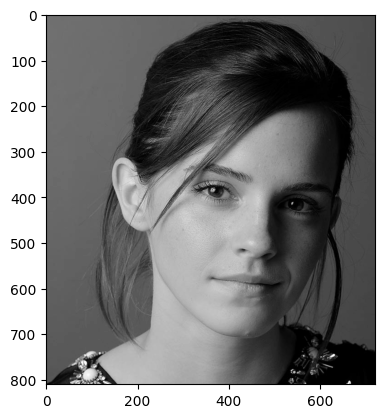

In [23]:
# Display using Matplotlib

fig,ax = plt.subplots()

ax.imshow(img,cmap="gray")
ax.set_title("")
plt.show()

In [24]:
# Display Image properties

print(img.shape)
print(img.size)
print(img.dtype)

(810, 720)
583200
uint8


51
100
105
256


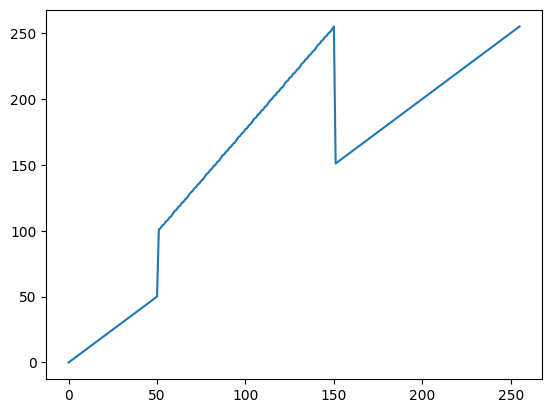

In [25]:
# Create Intensity Transformer

c= np.array([(50,50),(50,100),(150,255),(150,150)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
print(len(t1))
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
print(len(t2))
t3 = np.linspace(c[3,1]+1,255,255-c[3,0]).astype("uint8")
print(len(t3))

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

print(len(transform))

fig,ax = plt.subplots()
ax.plot(transform)
plt.show()

In [28]:
# Perform Transformation and visualize usinf opencv
transformed_image = cv.LUT(img,transform)
# Display Original Image
cv.namedWindow("Original image",cv.WINDOW_AUTOSIZE)
cv.imshow("Original image",img)
cv.waitKey(0)
# Display Transformed Image
cv.namedWindow("Transformed image",cv.WINDOW_AUTOSIZE)
cv.imshow("Transformed image",transformed_image)
cv.waitKey(0)
cv.destroyAllWindows()

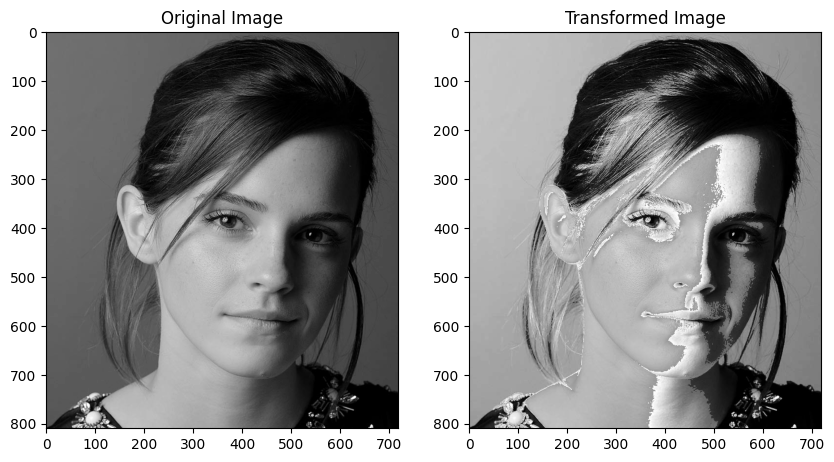

In [33]:
#visualize using matplotlib

fig,ax = plt.subplots(1,2,figsize=(10,8))

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(transformed_image,cmap="gray")
ax[1].set_title("Transformed Image")
plt.show()

# Question 02